#  <img src="uni7.jpg",width=150,height=150>

# <font color='green' >PROGRAMAÇÃO PARA DATA SCIENCE E DATA ANALYTICS</font>


### <font color='blue'>Alunos: Ramsés Felipe de Oliveira e Dieison Rabêlo</font>


## Exercicio 01

O Sr. Jaime Diga adquiriu um sistema para tratar o volume alto de dados que possui distribuído nas quase duas mil filiais de sua empresa espalhadas pelo mundo. O sistema irá tratar dados de vendas divididos em um arquivo de formato CSV para cada filial.
Os arquivos todos possuem um mesmo formato porém cada arquivo apresenta um tamanho diferente compatível com o volume de vendas da filial.

A equipe de TI processou alguns arquivos para testar o sistema e fazer estimativas. Assim, pede-se que se faça uma projeção de consumo de recursos de memória e de tempo de execução a partir dos dados levantados durante a execução dos arquivos de testes.

    

### Informações dos datasets (dados-conhecidos e dados-projetar)

1. file_size
2. exec_time
3. memory

#### Carregando alguns dos pacotes que serão utilizados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea

#### Carregando os datasets

In [2]:
dados_conhecidos = pd.read_csv('dados-conhecidos.csv', sep=';' )
colunas_dados_conhecidos = list(dados_conhecidos.columns) #transformei em lista para ficar melhor a forma de apresentação
print("Shape dados-conhecidos: ", dados_conhecidos.shape, "Colunas: ", colunas_dados_conhecidos)
print()

dados_projetar = pd.read_csv('dados-projetar.csv',sep=';')
colunas_dados_projetar = list(dados_projetar.columns)
print("Shape dados-Projetar: ", dados_projetar.shape, "Colunas: ", colunas_dados_projetar)

Shape dados-conhecidos:  (10, 3) Colunas:  ['file_size', 'exec_time', 'memory']

Shape dados-Projetar:  (90, 3) Colunas:  ['file_size', 'exec_time', 'memory']


In [3]:
print("Dados Conhecidos")
dados_conhecidos.head()

Dados Conhecidos


,file_size,exec_time,memory
0,0.97,29.99,5.93
1,1.12,43.24,8.22
2,1.25,46.70,12.89
3,1.54,60.18,22.86
4,1.58,64.42,23.27


In [4]:
print("Dados Projetar")
dados_projetar.head()

Dados Projetar


,file_size,exec_time,memory
0,4.18,NaN,NaN
1,1.52,NaN,NaN
2,2.10,NaN,NaN
3,1.13,NaN,NaN
4,1.86,NaN,NaN


### Considerando que o objetivo deste exercicio é projetar o consumo de recursos de memória e de tempo de execução a partir dos dados levantados durante a execução dos arquivos de testes, vamos começar a realizar uma analise exploratoria do dataset "Dados Conhecidos"

In [5]:
dados_conhecidos.dtypes

file_size    float64
exec_time    float64
memory       float64
dtype: object

In [6]:
dados_conhecidos.describe()

,file_size,exec_time,memory
count,10.000000,10.000000,10.000000
mean,2.744000,92.238000,36.913000
std,2.577282,54.820871,35.423819
min,0.970000,29.990000,5.930000
25%,1.322500,50.070000,15.382500
50%,1.865000,82.270000,25.565000
75%,3.125000,124.377500,46.127500
max,9.650000,207.740000,127.110000


In [7]:
dados_conhecidos.corr(method = 'pearson')

,file_size,exec_time,memory
file_size,1.000000,0.920516,0.987907
exec_time,0.920516,1.000000,0.953387
memory,0.987907,0.953387,1.000000


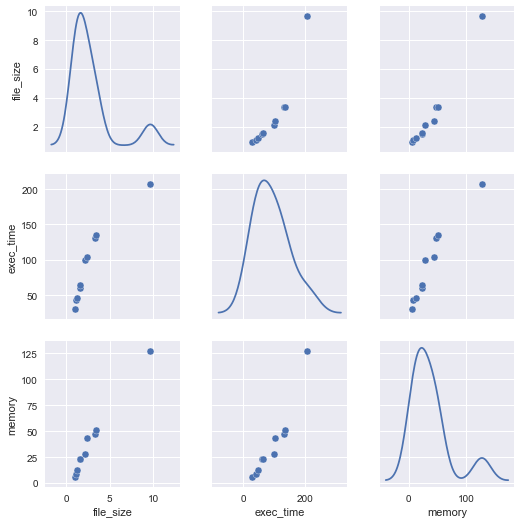

In [8]:
sea.pairplot(dados_conhecidos,diag_kind="kde",palette="hls")

## Regressão Linear com Scikit-Learn

In [9]:
from sklearn import linear_model

In [10]:
# Cria o objeto
modelo = linear_model.LinearRegression(normalize = False, fit_intercept = True) #para ser utilizado na predição do 'exec_time'
modelo2 = linear_model.LinearRegression(normalize = False, fit_intercept = True) #para ser utilizado na predição do 'memory'

In [11]:
# Define os valores de x e y
num_observ = len(dados_conhecidos)
X = dados_conhecidos['file_size'].values.reshape((num_observ, 1)) # X deve sempre ser uma matriz e nunca um vetor
y = dados_conhecidos['exec_time'].values # y pode ser um vetor

In [12]:
# Aplica o modelo - fit()
modelo.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# Imprime os coeficientes
print (modelo.coef_)
print (modelo.intercept_)

[ 19.58011349]
38.5101685741


In [14]:
# Imprime as previsões
valor_Previsto = modelo.predict(X)
print (valor_Previsto)

[  57.50287866   60.43989569   62.98531044   68.66354335   69.44674789
   80.60741258   85.89404323  104.29934991  105.08255445  227.45826379]


In [15]:
dados_conhecidos

,file_size,exec_time,memory
0,0.97,29.99,5.93
1,1.12,43.24,8.22
2,1.25,46.70,12.89
3,1.54,60.18,22.86
4,1.58,64.42,23.27
5,2.15,100.12,27.86
6,2.42,103.55,43.27
7,3.36,131.32,47.08
8,3.40,135.12,50.64
9,9.65,207.74,127.11


### Bastante dificuldade em aplicar metricas para analise. o conjunto de dados é bastante pequeno

In [16]:
valor_Real = list((dados_conhecidos['exec_time'] ))
valor_Previsto = list(valor_Previsto)
dataset = [valor_Real, valor_Previsto]
datasetPD = pd.DataFrame(dataset)
Relatorio = np.transpose(datasetPD) 
Relatorio.columns = ["valor_Real","valor_Previsto"]
Relatorio

,valor_Real,valor_Previsto
0,29.99,57.502879
1,43.24,60.439896
2,46.70,62.985310
3,60.18,68.663543
4,64.42,69.446748
5,100.12,80.607413
6,103.55,85.894043
7,131.32,104.299350
8,135.12,105.082554
9,207.74,227.458264


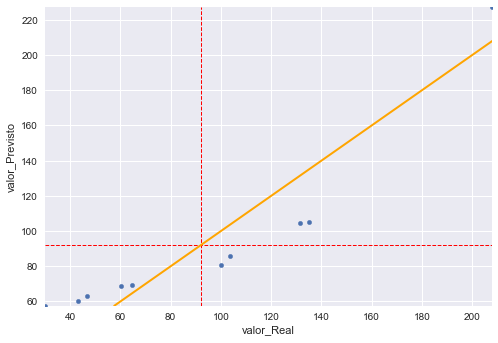

In [17]:
# Definindo o range dos valores de x e y
x_range = [Relatorio['valor_Real'].min(),Relatorio['valor_Real'].max()]
y_range = [Relatorio['valor_Previsto'].min(),Relatorio['valor_Previsto'].max()]
# Plot dos valores de x e y com a média
scatter_plot = Relatorio.plot(kind = 'scatter', x = 'valor_Real', y = 'valor_Previsto', xlim = x_range, ylim = y_range)

# Cálculo da média
meanY = scatter_plot.plot(x_range, [Relatorio['valor_Previsto'].mean(),Relatorio['valor_Previsto'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([Relatorio['valor_Real'].mean(), Relatorio['valor_Real'].mean()], y_range, '--', color = 'red', linewidth = 1)

# Terceira camada do Scatter Plot (linha de regressão)
regression_line = scatter_plot.plot(Relatorio['valor_Previsto'], valor_Previsto, '-', color = 'orange', linewidth = 2)

## Regressão Linear com o StatsModels

In [18]:
# Importando as funções
import statsmodels.api as sm
import statsmodels.formula.api as smf # (simula a criação do modelo em linguagem R )

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [19]:
# Gerando X e Y. Vamos adicionar a constante ao valor de X, gerando uma matrix.
y = dados_conhecidos['exec_time']
X = dados_conhecidos['file_size']

# Esse comando adiciona os valores dos coefientes à variável X (o bias será calculado internamente pela função)
#X = sm.add_constant(X)

In [20]:
X.head()

0    0.97
1    1.12
2    1.25
3    1.54
4    1.58
Name: file_size, dtype: float64

In [21]:
# Criando um modelo Ordinary Least Squares (outra forma de se referir a regressão linear)
modelo_v1 = sm.OLS(y, X)
modelo_v2 = modelo_v1.fit()
modelo_v2.summary()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              exec_time   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     85.38
Date:                Fri, 29 Jun 2018   Prob (F-statistic):           6.88e-06
Time:                        14:21:32   Log-Likelihood:                -49.063
No. Observations:                  10   AIC:                             100.1
Df Residuals:                       9   BIC:                             100.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
file_size     27.4032      2.966      9.240      0.000      20.694      34.112
==============================================================================
Omnibus:                       13.019   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                6.231
Skew:                          -1.633   Prob(JB):                       0.0444
Kurtosis:                       5.070   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Imprimindo os Parâmetros
print (modelo_v2.params)

file_size    27.403211
dtype: float64


In [23]:
# Gerando os valores previstos
valores_previstos = modelo_v2.predict(X)
valores_previstos

0     26.581115
1     30.691597
2     34.254014
3     42.200945
4     43.297074
5     58.916904
6     66.315771
7     92.074790
8     93.170919
9    264.440990
dtype: float64

In [24]:
dados_conhecidos

,file_size,exec_time,memory
0,0.97,29.99,5.93
1,1.12,43.24,8.22
2,1.25,46.70,12.89
3,1.54,60.18,22.86
4,1.58,64.42,23.27
5,2.15,100.12,27.86
6,2.42,103.55,43.27
7,3.36,131.32,47.08
8,3.40,135.12,50.64
9,9.65,207.74,127.11


In [25]:
valor_Real = list((dados_conhecidos['exec_time'] ))
valor_Previsto = list(valores_previstos)
dataset = [valor_Real, valor_Previsto]
datasetPD = pd.DataFrame(dataset)
Relatorio = np.transpose(datasetPD) 
Relatorio.columns = ["valor_Real","valor_Previsto"]
Relatorio

,valor_Real,valor_Previsto
0,29.99,26.581115
1,43.24,30.691597
2,46.70,34.254014
3,60.18,42.200945
4,64.42,43.297074
5,100.12,58.916904
6,103.55,66.315771
7,131.32,92.074790
8,135.12,93.170919
9,207.74,264.440990


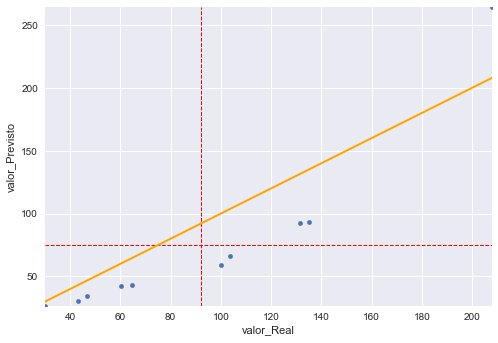

In [26]:
# Definindo o range dos valores de x e y
x_range = [Relatorio['valor_Real'].min(),Relatorio['valor_Real'].max()]
y_range = [Relatorio['valor_Previsto'].min(),Relatorio['valor_Previsto'].max()]
# Plot dos valores de x e y com a média
scatter_plot = Relatorio.plot(kind = 'scatter', x = 'valor_Real', y = 'valor_Previsto', xlim = x_range, ylim = y_range)

# Cálculo da média
meanY = scatter_plot.plot(x_range, [Relatorio['valor_Previsto'].mean(),Relatorio['valor_Previsto'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([Relatorio['valor_Real'].mean(), Relatorio['valor_Real'].mean()], y_range, '--', color = 'red', linewidth = 1)

# Terceira camada do Scatter Plot (linha de regressão)
regression_line = scatter_plot.plot(Relatorio['valor_Previsto'], valor_Previsto, '-', color = 'orange', linewidth = 2)

### Após realizarmos algumas analises e demonstrando algumas formas de se trabalhar com Regressão, iremos utilizar o Scitit learn para realizar as previsões solicitadas

### Considerando que apenas possuimos um dataset bastante pequeno, apenas com 10 resultados, iremos utilizar para treino, sem realizar procedimento de teste, e aplicaremos o modelo diretamente nos dados do segundo dataset. 

In [27]:
# Define os valores de x e y
num_observ = len(dados_conhecidos)
X = dados_conhecidos['file_size'].values.reshape((num_observ, 1)) # X deve sempre ser uma matriz e nunca um vetor
y = dados_conhecidos['exec_time'].values # y pode ser um vetor
y2 = dados_conhecidos['memory'].values

In [28]:
# Aplica o modelo - fit()
modelo.fit(X,y)
modelo2.fit(X,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
dados_projetar.head()

,file_size,exec_time,memory
0,4.18,NaN,NaN
1,1.52,NaN,NaN
2,2.10,NaN,NaN
3,1.13,NaN,NaN
4,1.86,NaN,NaN


In [30]:
X_projetar = dados_projetar['file_size']
#X_projetar = sm.add_constant(X_projetar)

In [31]:
valor_Previsto = modelo.predict(4.18)
valor_Previsto2 = modelo2.predict(4.18)
print (valor_Previsto)
print (valor_Previsto2)

[ 120.35504298]
[ 56.41162264]


In [32]:
dados_conhecidos

,file_size,exec_time,memory
0,0.97,29.99,5.93
1,1.12,43.24,8.22
2,1.25,46.70,12.89
3,1.54,60.18,22.86
4,1.58,64.42,23.27
5,2.15,100.12,27.86
6,2.42,103.55,43.27
7,3.36,131.32,47.08
8,3.40,135.12,50.64
9,9.65,207.74,127.11


In [33]:
exec_time = []
file_size = []
memory = []
tabela =[file_size,exec_time, memory]
for i in X_projetar:
   # print(i," - ", modelo.predict(i))
    valorPredito_exec_time = modelo.predict(i)[0]
    valorPredito_memory = modelo2.predict(i)[0]
    file_size.append(i)
    exec_time.append(valorPredito_exec_time)
    memory.append(valorPredito_memory)
tabela = pd.DataFrame(tabela)
tabela = np.transpose(tabela)
tabela.columns = ["file_size", "exec_time","memory"]
tabela

,file_size,exec_time,memory
0,4.18,120.355043,56.411623
1,1.52,68.271941,20.293004
2,2.10,79.628407,28.168492
3,1.13,60.635697,14.997417
4,1.86,74.929180,24.909670
5,1.82,74.145975,24.366533
6,1.73,72.383765,23.144474
7,1.21,62.202106,16.083691
8,0.85,55.153265,11.195457
9,1.22,62.397907,16.219476


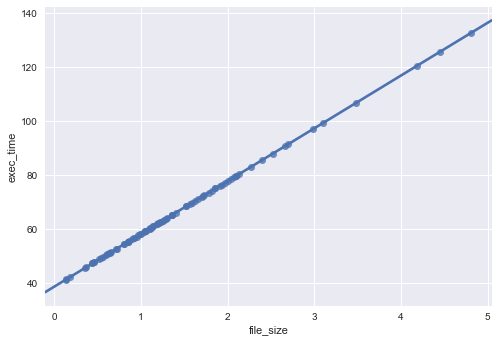

In [37]:
ax = sea.regplot(x="file_size", y="exec_time", data=tabela)

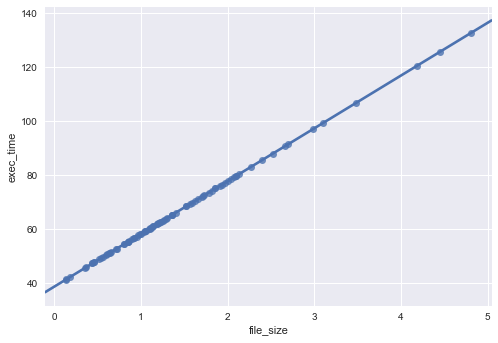

In [39]:
ax2 = sea.regplot(x="file_size", y="exec_time", data=tabela)

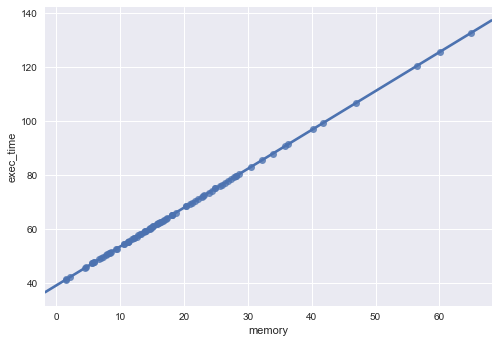

In [40]:
ax3 = sea.regplot(x="memory", y="exec_time", data=tabela)